Previous code to compute concentrations: BCA_calculate_conc.

Read in concentrations in units of micrograms protein/mL buffer.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

# Read in data from Excel
df = pd.read_excel('BCA_output_micro_tube.xlsx')

# Show the first few rows of the data
print(df.head())

# loosely-bound (lb) [ug protein/mL]
C_tmp_lb  = df.iloc[1:4, 1:].values  # indexing excludes the last index
## convert to numeric
C0_lb   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(C_tmp_lb)  # 2D array

# loosely-bound (tb) [ug protein/mL]
C_tmp_tb  = df.iloc[6:9, 1:].values  # indexing excludes the last index
## convert to numeric
C0_tb   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(C_tmp_tb)  # 2D array

# size_name = ['40', '20', '14', '10', '7', '5']
size_name = ['0 - 0.85', '0.85 - 1.4', '1.4 - 2', '2 - 2.8', '2.8 - 4', '>4']

  Units: ug protein/mL buffer  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                          LB   40.000000   20.000000   14.000000   10.000000   
1                           A   30.954689   34.277285   22.986160   19.805807   
2                           B   24.009244   23.872699   13.058244   10.105699   
3                           C   25.034198   29.739292   18.470571   18.869705   
4                         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  
0    7.000000    5.000000  
1   18.669975   18.736516  
2    6.404079    7.517184  
3   17.742363    8.956340  
4         NaN         NaN  


In [8]:
# verify data contents
#print(C0_lb)
print(C0_tb)
#print(size_name)

[[169.65782074 158.08888237 163.26231543 181.74414301 208.63223745
  161.75822008]
 [136.58073026 107.69015709  94.08039728  94.08039728 102.71295712
  161.68264778]
 [128.40199367 105.29164473 101.60902274  42.9658823  105.47600128
  111.38894917]]


Read in VSS data

In [9]:
# Read in VSS (mg VSS to 25 mg TSS)
VSS_tmp = df.iloc[10, 1:].values   
VSS_0  = pd.to_numeric(VSS_tmp, errors='coerce')
print(VSS_0)

[22.36842105 22.19827586 22.51712329 21.54150198 20.46460177 20.9375    ]


Convert the data from micrograms protein/mL buffer to mg protein/gVSS

In [11]:
# define VSS factor: 10 mL buffer / mg VSS in sample
VSS_factor = np.round(10 / VSS_0, 3)  
print(VSS_factor)

# determine concentration of unknown samples [ug protein/mg VSS] simplifies to [mg protein/gVSS]
C_lb = VSS_factor * C0_lb  # [mg/g VSS] 
print('concentration[ug/mL]: ', C_lb)

C_tb = VSS_factor * C0_tb  # [mg/g VSS] 
print('concentration[ug/mL]: ', C_tb)

[0.447 0.45  0.444 0.464 0.489 0.478]
concentration[ug/mL]:  [[13.83674597 15.42477836 10.20585522  9.18989454  9.12961775  8.95605461]
 [10.73213224 10.74271463  5.79786031  4.68904456  3.13159484  3.59321389]
 [11.19028638 13.38268133  8.20093336  8.75554316  8.6760156   4.28113032]]
concentration[ug/mL]:  [[ 75.83704587  71.13999707  72.48846805  84.32928236 102.02116411
   77.3204292 ]
 [ 61.05158642  48.46057069  41.77169639  43.65330434  50.22663603
   77.28430564]
 [ 57.39569117  47.38124013  45.1144061   19.93616939  51.57776463
   53.2439177 ]]


In [4]:
# standard deviation between As
std_A = np.std(C_lb[0:2,:], axis=0)
#print(std_A)

# standard deviation between all data
std_lb = np.std(C_lb, axis=0)
print(std_lb)

mean_lb = np.mean(C_lb[0:4,:], axis=0)
print(mean_lb)

[1.94037096 1.73530357 1.5745099  1.76005801 2.62996696 2.08349609]
[12.80679213 13.47560695  7.94755998  7.61765293  7.6473674   5.44319441]


In [5]:
print(len(C_lb[0]))
indices = np.arange(len(C_lb[0]))
print(indices)

6
[0 1 2 3 4 5]


In [8]:
# I can fit a line to the mean of all the data
# fit the standards 
coefs = poly.polyfit(indices, mean_lb, 1)  # 3rd deg polynomial
    
# create line of best fit 
C_fit = poly.polyval(indices, coefs)  # [ug/mL]
print('coefficients: ', coefs, '\n')


# How good is the fit?
# Solve for the coefficient of determination (R-squared)
corr_matrix = np.corrcoef(mean_lb, C_fit)  # (actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
print('R^2: ', R_sq)

coefficients:  [13.0586919  -1.56093184] 

R^2:  0.8219542050138813


#### Compare sample replicates

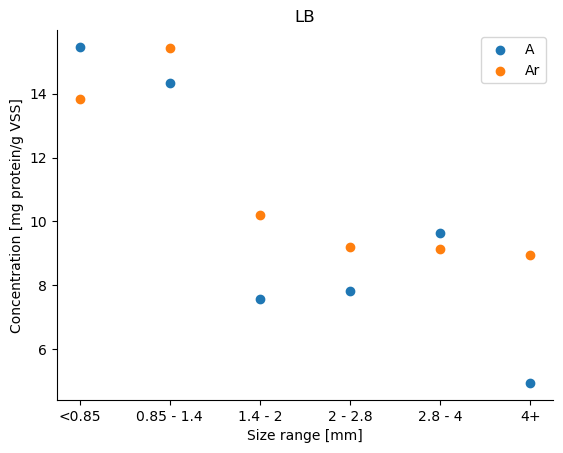

In [50]:
plt.scatter(size_name, C_lb[0,:], label = 'A')
plt.scatter(size_name, C_lb[1,:], label = 'Ar')

# axes labels
plt.title("LB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [mg protein/g VSS]")
plt.legend() 

#plt.errorbar(size_name, np.mean(C_lb[0:2,:], axis=0), std_A, linestyle='None', marker='^')

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('C-LB_A.png')

#### Plot Concentration [mg protein/g VSS]

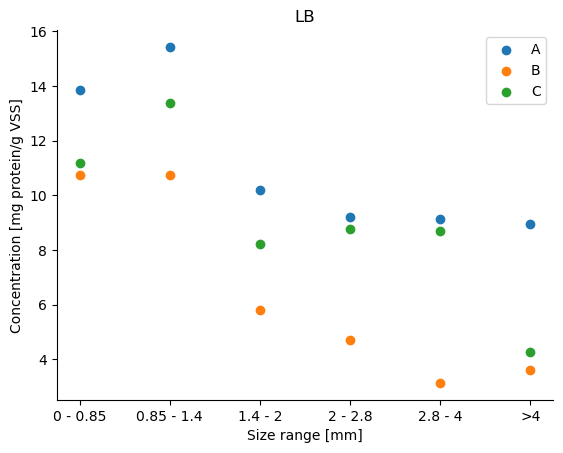

In [13]:
plt.scatter(size_name, C_lb[0,:], label = 'A')
plt.scatter(size_name, C_lb[1,:], label = 'B')
plt.scatter(size_name, C_lb[2,:], label = 'C')
#plt.plot(size_name, C_fit, label = 'mean fit')
#plt.plot(size_name, mean_lb, label = 'mean')

# axes labels
plt.title("LB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [mg protein/g VSS]")
plt.legend() 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('C-LB_VSS.png')

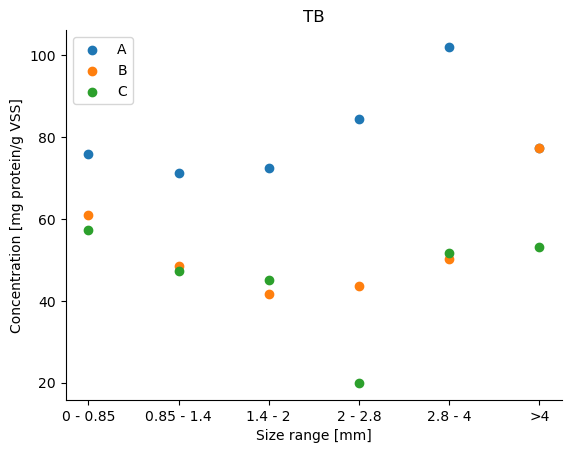

In [15]:
plt.scatter(size_name, C_tb[0,:], label = 'A')
plt.scatter(size_name, C_tb[1,:], label = 'B')
plt.scatter(size_name, C_tb[2,:], label = 'C')
#plt.plot(size_name, C_fit, label = 'mean fit')
#plt.plot(size_name, mean_lb, label = 'mean')

# axes labels
plt.title("TB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [mg protein/g VSS]")
plt.legend(loc='upper left') 
#plt.legend(loc='upper left') 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('C-TB_VSS.png')

Same plots in the original units (microgram protein/mL buffer)

#### Plot Concentration [ug protein/mL buffer]

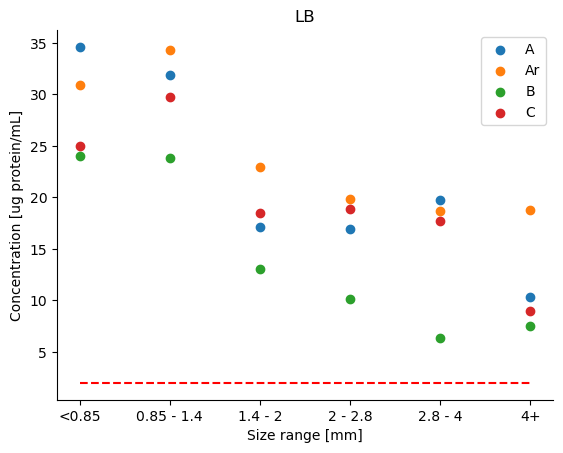

In [48]:
plt.scatter(size_name, C0[0,:], label = 'A')
plt.scatter(size_name, C0[1,:], label = 'Ar')
plt.scatter(size_name, C0[2,:], label = 'B')
plt.scatter(size_name, C0[3,:], label = 'C')

# axes labels
plt.title("LB")
plt.xlabel("Size range [mm]")
plt.ylabel("Concentration [ug protein/mL]")
plt.legend() 

# Draw horizontal lines at lower working range
plt.hlines(y=2, xmin=0, xmax=5, colors='r', linestyles='--')

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('C-LB_mL.png')